In [5]:
#download the dataset using this command (!wget link_to_dataset)
!wget https://www.dropbox.com/sh/2idnozs4741hzkr/AABXTlPlU-1f4L_VdS4wY06ca?dl=0

--2021-01-27 13:04:21--  https://www.dropbox.com/sh/2idnozs4741hzkr/AABXTlPlU-1f4L_VdS4wY06ca?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.5.18, 2620:100:601d:18::a27d:512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.5.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /sh/raw/2idnozs4741hzkr/AABXTlPlU-1f4L_VdS4wY06ca [following]
--2021-01-27 13:04:21--  https://www.dropbox.com/sh/raw/2idnozs4741hzkr/AABXTlPlU-1f4L_VdS4wY06ca
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc4f2df5281d37d32edfd4aab17c.dl.dropboxusercontent.com/zip_download_get/ArN5yDi6XArGz3REOAlfVYuGN5NAnoly5Qs7OLfVrcv1VYMsCDEZ0ql85F4hlwsLjBIC9WcYtrbrdI1u3-2MZlniHrTiOja6UNWT4IVa36lfcA [following]
--2021-01-27 13:04:22--  https://uc4f2df5281d37d32edfd4aab17c.dl.dropboxusercontent.com/zip_download_get/ArN5yDi6XArGz3REOAlfVYuGN5NAnoly5Qs7OLfVrcv1VYMsCDEZ0ql85F4hlwsLjBIC9WcYtrbrdI1u3

In [6]:
#now unzip the dataset using this command(!unzip file_name)
#name of file will be displayed in last line(see  _________ saved)
!unzip AABXTlPlU-1f4L_VdS4wY06ca?dl=0

Archive:  AABXTlPlU-1f4L_VdS4wY06ca?dl=0
mapname:  conversion of  failed
   creating: Images/
   creating: Images/cats/
   creating: Images/dogs/
   creating: Images/horses/
   creating: Images/humans/
 extracting: Images/cats/cat.3.jpg   
 extracting: Images/dogs/dog.3.jpg   
 extracting: Images/cats/cat.8.jpg   
 extracting: Images/dogs/dog.8.jpg   
 extracting: Images/cats/cat.5.jpg   
 extracting: Images/dogs/dog.5.jpg   
 extracting: Images/cats/cat.6.jpg   
 extracting: Images/dogs/dog.2.jpg   
 extracting: Images/dogs/dog.9.jpg   
 extracting: Images/dogs/dog.4.jpg   
 extracting: Images/cats/cat.1.jpg   
 extracting: Images/cats/cat.9.jpg   
 extracting: Images/dogs/dog.7.jpg   
 extracting: Images/cats/cat.4.jpg   
 extracting: Images/dogs/dog.6.jpg   
 extracting: Images/cats/cat.7.jpg   
 extracting: Images/dogs/dog.1.jpg   
 extracting: Images/cats/cat.2.jpg   
 extracting: Images/dogs/dog.82.jpg  
 extracting: Images/cats/cat.75.jpg  
 extracting: Images/cats/cat.45.jpg  


In [7]:
import os,shutil
#os to travel in folders and shutil to move files

In [8]:
# show the list of folders in current directory
!ls

'AABXTlPlU-1f4L_VdS4wY06ca?dl=0'   Images   sample_data


In [9]:
#listdir returns the list of folders inside a given path
folders=os.listdir('Images')
#we also need to create a validation dataset
#if val_images is not present in the path then create a folder named val_images using mkdir command
if not os.path.isdir('val_images'):
  os.mkdir('val_images')
classes=['dogs','cats','humans','horses']
!ls
#check using !ls if val_images has been created
#now create these 4 classes inside val_images folder
for c in classes:
  #make path
  p=os.path.join('val_images',c)
  #if path is not present then make a folder
  if p not in os.listdir('val_images'):
    try:
      os.mkdir(p)
    except:
      pass
#10 % of training data will be used for validation
split=0.9
for f in os.listdir('Images'):
  path='Images/'+f
  #returns paths of all files in the folder f
  imgs=os.listdir(path)
  #spli these files into test & validation data
  split_size=int(split*len(imgs))
  #move the validation files to val_images folder
  files_to_move=imgs[split_size:]
  #print(len(files_to_move))
   
  for img_f in files_to_move:
    #now for each file which is to be moved specify the path of file and the location to which it is to be moved
    src=os.path.join(path,img_f)
    dest=os.path.join('val_images/'+f,img_f)
    #move it using shutil.move
    shutil.move(src,dest)

'AABXTlPlU-1f4L_VdS4wY06ca?dl=0'   Images   sample_data   val_images


In [10]:
#check how many examples are there in each folder now
for f in folders:
  path='Images/'+f
  print(f+" " +str(len(os.listdir(path))))
for f in folders:
  path='val_images/'+f
  print(f+" " +str(len(os.listdir(path))))
    

cats 181
humans 181
horses 181
dogs 181
cats 21
humans 21
horses 21
dogs 21


In [11]:
from keras.preprocessing import image
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Input, Convolution2D,MaxPooling2D,Flatten,Dense,Dropout
#CNN MODEL
#initialise the model
model=Sequential()
#add a convolutional layer with 32 filters and filter size as (3,3) & input size as 150,150
model.add(Convolution2D(32,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(MaxPooling2D(2,2))
#another convolutional layer( no need of input_size as it takes input from previous layer)
model.add(Convolution2D(128,(3,3),activation='relu'))
#Add a dropout to reduce overfitting(here 25% neurons will be dropped out)
model.add(Dropout(0.25))
#Add a pooling Layer with filter size(2,2)
model.add(MaxPooling2D(2,2))
model.add(Convolution2D(128,(5,5),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Convolution2D(64,(5,5),activation='relu'))
model.add(MaxPooling2D(2,2))
#Flatten the data and feed to Dense Layer(4 neurons because number of classes is 4)
model.add(Flatten())
model.add(Dense(4,activation='softmax'))

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 128)       36992     
_________________________________________________________________
dropout (Dropout)            (None, 72, 72, 128)       0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 128)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 128)       409728    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 128)       0

In [13]:
#set learning rate of optimizer
from keras import optimizers
adam=optimizers.Adam(lr=1e-4)

In [14]:
#compile the model
#since it is a multi class classification problem so we use categorical cross entropy 
model.compile(loss='categorical_crossentropy',optimizer=adam,metrics=['acc'])  

In [15]:
#Train the model
#model.fit() is used when dataset is small and can fit inside memory!
#Method for large methods(Method of generators)
#we feed data to model in batches and clear the memory after every batch and load new batch

In [16]:
from keras.preprocessing.image import ImageDataGenerator

In [17]:
#initialise the ImagedataGenerator object with rescale factor=1/255.0 to bring prixel values of each image b/w 0 & 1
train_gen=ImageDataGenerator(rescale=1.0/255.0,rotation_range=40,width_shift_range=0.2,height_shift_range=0.2,shear_range=0.2,zoom_range=0.3,horizontal_flip=True)
#one for validation generator also
val_gen=ImageDataGenerator(rescale=1.0/255.0,rotation_range=40,width_shift_range=0.2,height_shift_range=0.2,shear_range=0.2,zoom_range=0.3,horizontal_flip=True)
#flow from directory goes into each folder of given path and extracts data and it makes classes according to the folders
#image size has been kept 150,150 with batch_size=32
train_generator=train_gen.flow_from_directory('Images/',target_size=(150,150),batch_size=32,class_mode='categorical')
val_generator=val_gen.flow_from_directory('val_images/',target_size=(150,150),batch_size=32,class_mode='categorical')

Found 724 images belonging to 4 classes.
Found 84 images belonging to 4 classes.


In [18]:
#shows the labels assigned to data
train_generator.labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [19]:
#next function loads the next batch
#X,Y=train_generator.next()

In [20]:
#32 images in one batch of size(150,150,3)
#Y has 32 labels in one hot notation(so columns=4)
#print(X.shape,Y.shape)

In [21]:
#labels are in one hot notation
#to move over training data use a loop
for x,y in train_generator:
  print(x.shape,y.shape)
  break

(32, 150, 150, 3) (32, 4)


In [22]:
#Train the model
#steps per epoch meanshow many batches to process per epoch
#validation_steps mean how many batches of validation data are to be taken each time
hist=model.fit_generator(train_generator,epochs=60,steps_per_epoch=7,validation_data=val_generator,validation_steps=3)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/60
7/7 [==============================] - 28s 4s/step - loss: 1.3918 - acc: 0.2594 - val_loss: 1.3800 - val_acc: 0.2857
Epoch 2/60
7/7 [==============================] - 25s 4s/step - loss: 1.3741 - acc: 0.2759 - val_loss: 1.3829 - val_acc: 0.2738
Epoch 3/60
7/7 [==============================] - 25s 4s/step - loss: 1.3711 - acc: 0.3272 - val_loss: 1.3846 - val_acc: 0.2738
Epoch 4/60
7/7 [==============================] - 26s 4s/step - loss: 1.3751 - acc: 0.2761 - val_loss: 1.3766 - val_acc: 0.3333
Epoch 5/60
7/7 [==============================] - 25s 4s/step - loss: 1.3714 - acc: 0.2371 - val_loss: 1.3735 - val_acc: 0.3571
Epoch 6/60
7/7 [==============================] - 26s 4s/step - loss: 1.3648 - acc: 0.3432 - val_loss: 1.3720 - val_acc: 0.2619
Epoch 7/60
7/7 [==============================] - 26s 4s/step - loss: 1.3624 - acc: 0.2856 - val_loss: 1.3577 - val_acc: 0.3452
Epoch 8/60
7/7 [==============================] - 26s 4s/step - loss: 1.3535 - acc: 0.3232 - val_loss: 1

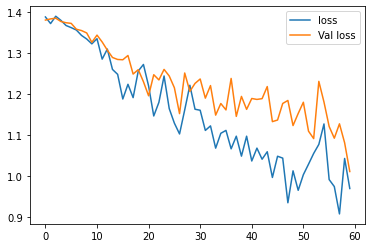

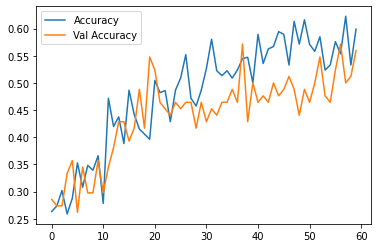

In [23]:
#print(hist.history['val_acc'])
plt.plot(hist.history['loss'],label='loss')
plt.plot(hist.history['val_loss'],label='Val loss')
plt.legend()
plt.show()
plt.plot(hist.history['acc'],label='Accuracy')
plt.plot(hist.history['val_acc'],label='Val Accuracy')
plt.legend()
plt.show()